In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [164]:
df_index=pd.read_csv("D:/Users/USER/Downloads/economic_index.csv")

In [165]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [166]:
# drop unnecessary columns
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [167]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

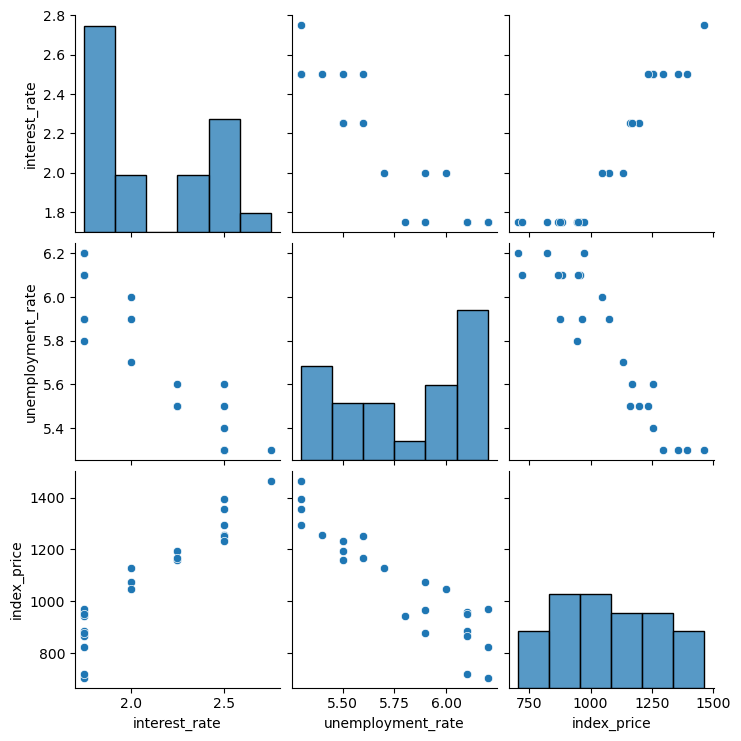

In [168]:
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [169]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


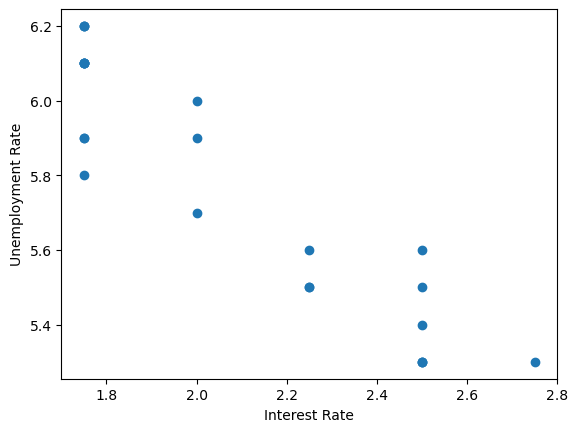

In [170]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'])
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")
plt.show()

In [171]:
# Independent and Dependent Features
X = df_index[['interest_rate', 'unemployment_rate']]

In [172]:
y=df_index['index_price']

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [174]:
import seaborn as sns

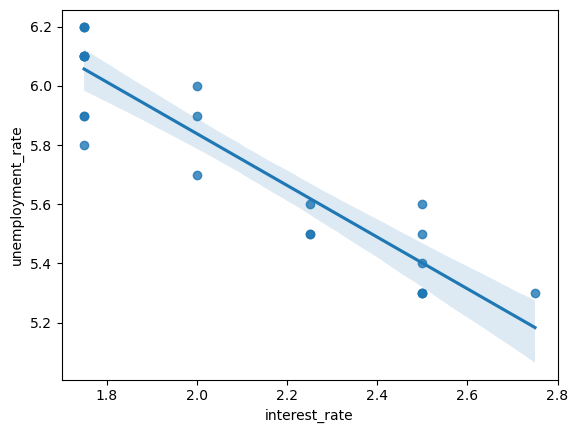

In [175]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])
plt.show()

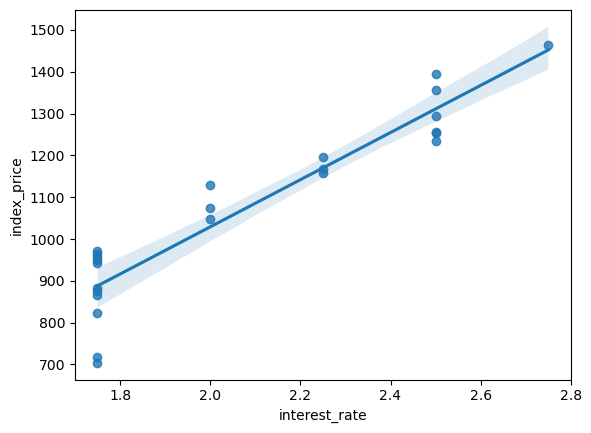

In [176]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])
plt.show()

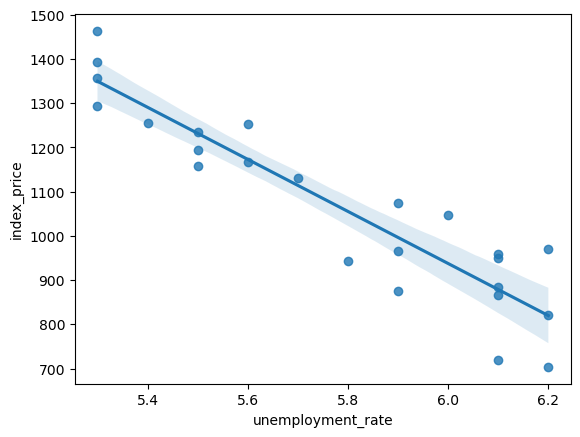

In [177]:
sns.regplot(x=df_index['unemployment_rate'], y=df_index['index_price'])
plt.show()

In [178]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [179]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [180]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [181]:
regression.fit(X_train, y_train)

LinearRegression()

In [182]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [183]:
np.mean(validation_score)

-5914.828180162388

In [184]:
#prediction
y_pred=regression.predict(X_test)

In [185]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712583
59.93578152323558
76.11677139574815


In [187]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print(score)

0.8278978091457141


In [188]:
import statsmodels.api as sm
model=sm.OLS(y_train, X_train).fit()
pred = model.predict(X_test)

In [189]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 29 Jul 2025   Prob (F-statistic):                       0.754
Time:                        15:28:26   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


## Assumptions

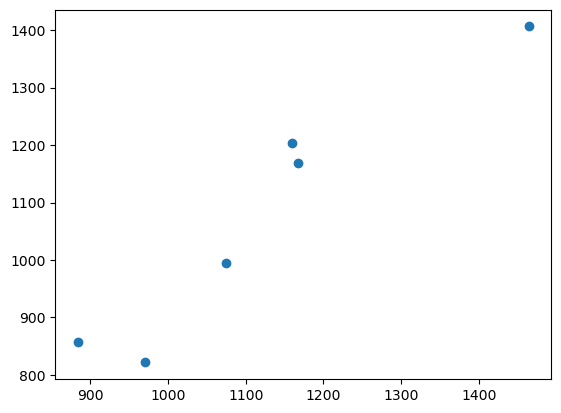

In [191]:
plt.scatter(y_test, y_pred)
plt.show()
#If relationship is linear, the model is performed well

In [192]:
residuals=y_test-y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

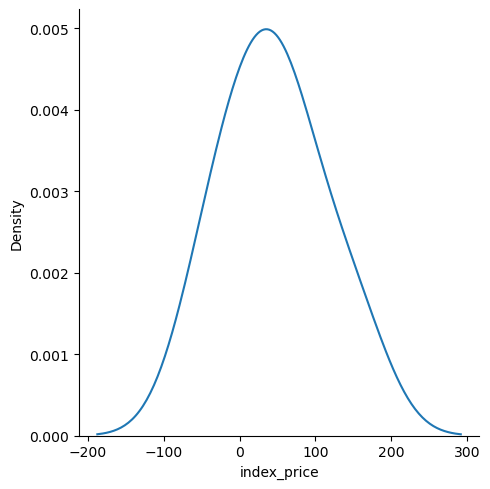

In [225]:
sns.displot(residuals, kind='kde')
plt.show()
#below kind of plot suggests the model is performing well

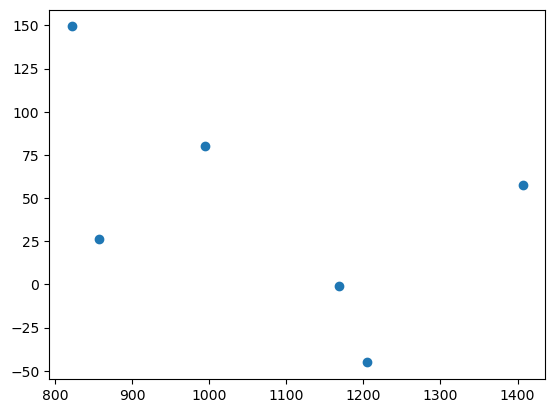

In [229]:
plt.scatter(y_pred, residuals)
plt.show()
#no pattern, means the model is good. If pattern found 